### READ ME

Use the code blocks below to answer each question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [564]:
import pandas as pd
df = pd.read_csv('student_enrollment_sample.csv')

In [565]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df_test = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df_test:
  for i, value in df_test[col].items():
    df_test.at[i, col] = f'{i}/{col}'

df_test

Col1       Col2       Col3       Col4
Row1  Row1/Col1  Row1/Col2  Row1/Col3  Row1/Col4
Row2  Row2/Col1  Row2/Col2  Row2/Col3  Row2/Col4
Row3  Row3/Col1  Row3/Col2  Row3/Col3  Row3/Col4

## **Data Import**

In [566]:
# Question 1: Import the data file posted along with this assignment called
# 'student_enrollment_sample.csv'. This file contains real data from a large 
# online university in the United States. The identifying information has been
# deleted or randomized to maintain anonymity according to FERPA requirements. 
# This university wants to help their students succeed. However, many of them
# drop out for a variety of reasons. Some feel hopeless, helpless, or lost. The
# university wants to identify those students who are currently active, but
# likely to drop in the near future so that they can intervene and get the them 
# additional help. Your task is to create a predictive model to classify those 
# students who are predicted to drop, but currently active to give to the
# advisement center for targeted interventions. Complete the steps as outlined
# in the questions to complete this task.

# First, print out the first five records of the dataset. How many students are 
# in this sample?
print(df.shape[0])
df.head()

50001


EXPECTED_START_DATE GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
0                 NaN             NaN           1.0             0.0   
1                 NaN        2/8/2016           1.0             0.0   
2                 NaN             NaN           1.0             0.0   
3                 NaN             NaN           1.0             0.0   
4                 NaN             NaN           1.0             0.0   

   MINUTES_ATTENDED  HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  \
0               NaN              0.0           0.0                0.0   
1               NaN              0.0           0.0                0.0   
2               NaN              0.0           0.0                0.0   
3               NaN              0.0           0.0                0.0   
4               NaN              0.0           0.0                0.0   

   MINUTES_ABSENT  DAYS_ABSENT  ...  CREDITS_LEFT  ENROLLMENT_COUNT  \
0             NaN          0.0  ...           NaN               NaN   
1             NaN          0.0  ...           NaN               NaN   
2             NaN          0.0  ...         180.0               2.0   
3             NaN          0.0  ...          60.0               3.0   
4             NaN          0.0  ...           NaN               NaN   

  MODS_ATTENDED_COUNT HS_GRADUATED_FLAG DISABLED_FLAG  HISPANIC_FLAG  \
0                 NaN               NaN           NaN            NaN   
1                 NaN               NaN           NaN            NaN   
2                 0.0               0.0           0.0            0.0   
3                 0.0               0.0           0.0            1.0   
4                 NaN               NaN           NaN            NaN   

   VETERAN_FLAG               STATUS_DESCRIPTION  IN_SCHOOL_FLAG  \
0           NaN            Application Cancelled             0.0   
1           NaN                        Applicant             0.0   
2           0.0  Pending Applicant - Portal Only             0.0   
3           0.0                        Applicant             0.0   
4           NaN  Pending Applicant - Portal Only             0.0   

   SIMPLE_STATUS_DESCRIPTION  
0                      Other  
1                      Other  
2                      Other  
3                      Other  
4                      Other  

[5 rows x 35 columns]

# **Two-Class Modeling**

## **Data Cleaning**

### Missing Values

In [567]:
# Question 2: Print out a list of missing values for each column in the 
# dataset. HINT: search for 'pandas .isna() example'
df.isna().sum().sort_values(ascending=False)

CUMMULATIVE_GPA_CREDITS      37157
CUMMULATIVE_GPA_POINTS       37157
MINUTES_ABSENT               16297
MINUTES_MAKEUP               16297
MINUTES_ATTENDED             16287
CUMMULATIVE_GPA              15550
LAST_ACTIVITY_DATE            4388
EXPECTED_START_DATE           1871
GRADUATION_DATE               1598
COHORT_YEAR                   1375
BIRTH_DATE                    1361
CREDITS_LEFT                  1336
CREDITS_REQUIRED              1336
MOD_NUMBER                    1324
DISABLED_FLAG                 1323
CREDITS_EARNED                1323
CREDITS_ATTEMPTED             1323
HS_GRADUATED_FLAG             1323
AR_BALANCE                    1323
ENROLLMENT_COUNT              1323
HISPANIC_FLAG                 1323
MODS_ATTENDED_COUNT           1323
VETERAN_FLAG                  1323
ENROLLMENT_GPA                1322
PROGRAM_GROUP                   14
STATUS_DESCRIPTION               1
IN_SCHOOL_FLAG                   1
AR_BALANCE_AMOUNT                1
DAYS_ABSENT         

In [568]:
# Question 3: Make a copy of the original DataFrame to work with
# (in case we want to use the original again later). Iterate through
# the new DataFrame and remove any column that has more than 30% of
# the records/cases missing. Print out a summary of missing value
# percentages for each remaining column.
df2 = df.copy()
for col in df2:
    if col in df2.columns:
        messages = True
        rows = df2.shape[0]
        missing = round(((df2[col].isna().sum())/rows)*100,2)
          
        if missing >= 30:
            if messages: print (f"Dropped {col}- {missing}% missing")
            df2.drop(columns=[col], inplace=True)
        else:
            if messages: print (f"{col} - {missing}% missing")

EXPECTED_START_DATE - 3.74% missing
GRADUATION_DATE - 3.2% missing
ENROLL_COUNT - 0.0% missing
NUMBER_AVERAGE - 0.0% missing
Dropped MINUTES_ATTENDED- 32.57% missing
HOURS_ATTEMPTED - 0.0% missing
HOURS_EARNED - 0.0% missing
AR_BALANCE_AMOUNT - 0.0% missing
Dropped MINUTES_ABSENT- 32.59% missing
DAYS_ABSENT - 0.0% missing
Dropped MINUTES_MAKEUP- 32.59% missing
REENTRY_NUMBER - 0.0% missing
PROGRAM_GROUP - 0.03% missing
BIRTH_DATE - 2.72% missing
LAST_ACTIVITY_DATE - 8.78% missing
MOD_NUMBER - 2.65% missing
COHORT_YEAR - 2.75% missing
Dropped CUMMULATIVE_GPA- 31.1% missing
Dropped CUMMULATIVE_GPA_POINTS- 74.31% missing
Dropped CUMMULATIVE_GPA_CREDITS- 74.31% missing
AR_BALANCE - 2.65% missing
ENROLLMENT_GPA - 2.64% missing
CREDITS_ATTEMPTED - 2.65% missing
CREDITS_EARNED - 2.65% missing
CREDITS_REQUIRED - 2.67% missing
CREDITS_LEFT - 2.67% missing
ENROLLMENT_COUNT - 2.65% missing
MODS_ATTENDED_COUNT - 2.65% missing
HS_GRADUATED_FLAG - 2.65% missing
DISABLED_FLAG - 2.65% missing
HISPANIC

In [569]:
# Question 4: Drop all remaining rows that contain any missing data.
# Print out the numer of rows and columns in the remaining dataset.

df2.dropna(inplace=True)

print(df2.shape)
df2.head()

(44965, 29)


EXPECTED_START_DATE GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
1873           5/10/2021       4/21/2024           1.0             0.0   
1874           5/10/2021       3/24/2024           1.0             0.0   
1875           5/10/2021       3/24/2024           1.0             0.0   
1876           5/10/2021       11/6/2022           1.0             0.0   
1878           5/10/2021       11/6/2022           1.0             0.0   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
1873              0.0           0.0                0.0          0.0   
1874              0.0           0.0                0.0          0.0   
1875              0.0           0.0                0.0          0.0   
1876              0.0           0.0                0.0          0.0   
1878              0.0           0.0                0.0          0.0   

      REENTRY_NUMBER PROGRAM_GROUP  ... CREDITS_LEFT ENROLLMENT_COUNT  \
1873             0.0         GAGAB  ...        183.0              2.0   
1874             0.0         BUBAB  ...        180.0              1.0   
1875             0.0         BUBAB  ...        180.0              1.0   
1876             0.0         MSMAA  ...         95.0              1.0   
1878             0.0         MSMAA  ...         95.0              1.0   

      MODS_ATTENDED_COUNT  HS_GRADUATED_FLAG  DISABLED_FLAG  HISPANIC_FLAG  \
1873                  1.0                0.0            0.0            0.0   
1874                  0.0                0.0            0.0            0.0   
1875                  0.0                0.0            0.0            0.0   
1876                  1.0                0.0            0.0            0.0   
1878                  0.0                0.0            0.0            0.0   

      VETERAN_FLAG  STATUS_DESCRIPTION  IN_SCHOOL_FLAG  \
1873           0.0        Future Start             0.0   
1874           0.0           Applicant             0.0   
1875           0.0           Applicant             0.0   
1876           0.0        Future Start             0.0   
1878           0.0           Applicant             0.0   

      SIMPLE_STATUS_DESCRIPTION  
1873                      Other  
1874                      Other  
1875                      Other  
1876                      Other  
1878                      Other  

[5 rows x 29 columns]

### Handle Dates

In [570]:
# Question 5: Now it's time to handle the date values. LAST_ACTIVITY_DATE,
# EXPECTED_START_DATE, BIRTH_DATE, and GRADUATION_DATE may all be useful. 
# For LAST_ACTIVITY_DATE, EXPECTED_START_DATE, and BIRTH_DATE, replace the 
# date value with the number of days between that date and 2022-1-1. In other
# words: 2022-1-1 minus the date value in the field. For GRADUATION_DATE, 
# replace the date value with the number of days until graduation assuming
# that today's date is 2020-1-1. In other words, calculate: GRADUATION_DATE 
# minus 2020-1-1. Print out the first five rows to examine the results.

df2['LAST_ACTIVITY_DATE']= (pd.to_datetime('2022-01-01') - pd.to_datetime(df2['LAST_ACTIVITY_DATE'])).dt.days
df2['EXPECTED_START_DATE']=(pd.to_datetime('2022-01-01') - pd.to_datetime(df2['EXPECTED_START_DATE'])).dt.days
df2['BIRTH_DATE']=(pd.to_datetime('2022-01-01') - pd.to_datetime(df2['BIRTH_DATE'])).dt.days
df2['GRADUATION_DATE']=(pd.to_datetime(df2['GRADUATION_DATE']) - pd.to_datetime('2020-01-01')).dt.days

df2.head()

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
1873                  236             1572           1.0             0.0   
1874                  236             1544           1.0             0.0   
1875                  236             1544           1.0             0.0   
1876                  236             1040           1.0             0.0   
1878                  236             1040           1.0             0.0   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
1873              0.0           0.0                0.0          0.0   
1874              0.0           0.0                0.0          0.0   
1875              0.0           0.0                0.0          0.0   
1876              0.0           0.0                0.0          0.0   
1878              0.0           0.0                0.0          0.0   

      REENTRY_NUMBER PROGRAM_GROUP  ...  CREDITS_LEFT  ENROLLMENT_COUNT  \
1873             0.0         GAGAB  ...         183.0               2.0   
1874             0.0         BUBAB  ...         180.0               1.0   
1875             0.0         BUBAB  ...         180.0               1.0   
1876             0.0         MSMAA  ...          95.0               1.0   
1878             0.0         MSMAA  ...          95.0               1.0   

      MODS_ATTENDED_COUNT  HS_GRADUATED_FLAG  DISABLED_FLAG  HISPANIC_FLAG  \
1873                  1.0                0.0            0.0            0.0   
1874                  0.0                0.0            0.0            0.0   
1875                  0.0                0.0            0.0            0.0   
1876                  1.0                0.0            0.0            0.0   
1878                  0.0                0.0            0.0            0.0   

      VETERAN_FLAG  STATUS_DESCRIPTION  IN_SCHOOL_FLAG  \
1873           0.0        Future Start             0.0   
1874           0.0           Applicant             0.0   
1875           0.0           Applicant             0.0   
1876           0.0        Future Start             0.0   
1878           0.0           Applicant             0.0   

      SIMPLE_STATUS_DESCRIPTION  
1873                      Other  
1874                      Other  
1875                      Other  
1876                      Other  
1878                      Other  

[5 rows x 29 columns]

### Bin Categorical Values

In [571]:
# Question 6: The PROGRAM_GROUP feature indicates which academic program
# the student is working on. Some of them are very small programs and 
# represent less than five percent of the data. We need to bin those programs
# into a new value called "Other". Start by printing a list of PROGRAM_GROUP
# values divided by the total number of records in order to see what percent
# of the cases they represent. Then, iterate through the rows and change every 
# program value to "Other" if it does not belong to a PROGRAM_GROUP that 
# represents at least five percent of the cases. Finally, print out the new 
# listof PROGRAM_GROUP values (including the new 'Other') to make sure your
# routine worked correctly. You do not need to print the values in 'percent'
# format. The original decimal values are fine.

groups = df2['PROGRAM_GROUP'].value_counts()/df2.shape[0]
print(groups)

for groups, ratio in groups.items():
    if ratio <= 0.05:
        df2.loc[df2['PROGRAM_GROUP'] == groups, 'PROGRAM_GROUP'] ='OTHER'

# Print the updated PROGRAM_GROUP values
df2['PROGRAM_GROUP'].value_counts()

PROGRAM_GROUP
GAGAB    0.282220
MSMAA    0.238341
HSHMB    0.140576
CSSMB    0.102791
CSCNB    0.099944
BUBAB    0.097209
GAWDB    0.020282
ACACB    0.009986
RTRCB    0.001979
BUBUA    0.001623
CSISM    0.001179
NUNUB    0.000912
MSMSA    0.000801
BUBUD    0.000512
HSSTA    0.000378
CSCNA    0.000334
RTRTA    0.000267
NUNEA    0.000156
BUBMA    0.000133
GAGAA    0.000133
NUNAM    0.000111
BUBAM    0.000044
CSNIB    0.000022
NUNEM    0.000022
HSPHM    0.000022
HSHAM    0.000022
Name: count, dtype: float64


PROGRAM_GROUP
GAGAB    12690
MSMAA    10717
HSHMB     6321
CSSMB     4622
CSCNB     4494
BUBAB     4371
OTHER     1750
Name: count, dtype: int64

### Relabel Label

In [572]:
# Question 7: Print the first five records of a filtered version of 
# the DataFrame including only the 'IN_SCHOOL_FLAG' and 'STATUS_DESCRIPTION' 
# features. Notice that all those who have graduated have an 'IN_SCHOOL_FLAG'
# of zero which makes them the same as students who have dropped out or
# have been terminated. Because we want students to graduate, we need to 
# treat them the same as those who are active. Therefore, convert the 
# 'IN_SCHOOL_FLAG' value for all graduates to 1 (or 1.0). In addition, convert
# their 'SIMPLE_STATUS_DESCRIPTION' to 'Active'.

# inspect In School Flag, Status Description, and Simple Status Description
filtered_df2 = df2.copy()
keep_columns = ['IN_SCHOOL_FLAG','STATUS_DESCRIPTION', 'SIMPLE_STATUS_DESCRIPTION']
filtered_df2 = filtered_df2[keep_columns]
filtered_df2.head()

# Update and rename
df2.loc[df2['STATUS_DESCRIPTION'] == 'Graduate', 'IN_SCHOOL_FLAG'] = 1.0
df2.loc[df2['STATUS_DESCRIPTION'] == 'Graduate', 'SIMPLE_STATUS_DESCRIPTION'] = 'Active'

df2.head()

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
1873                  236             1572           1.0             0.0   
1874                  236             1544           1.0             0.0   
1875                  236             1544           1.0             0.0   
1876                  236             1040           1.0             0.0   
1878                  236             1040           1.0             0.0   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
1873              0.0           0.0                0.0          0.0   
1874              0.0           0.0                0.0          0.0   
1875              0.0           0.0                0.0          0.0   
1876              0.0           0.0                0.0          0.0   
1878              0.0           0.0                0.0          0.0   

      REENTRY_NUMBER PROGRAM_GROUP  ...  CREDITS_LEFT  ENROLLMENT_COUNT  \
1873             0.0         GAGAB  ...         183.0               2.0   
1874             0.0         BUBAB  ...         180.0               1.0   
1875             0.0         BUBAB  ...         180.0               1.0   
1876             0.0         MSMAA  ...          95.0               1.0   
1878             0.0         MSMAA  ...          95.0               1.0   

      MODS_ATTENDED_COUNT  HS_GRADUATED_FLAG  DISABLED_FLAG  HISPANIC_FLAG  \
1873                  1.0                0.0            0.0            0.0   
1874                  0.0                0.0            0.0            0.0   
1875                  0.0                0.0            0.0            0.0   
1876                  1.0                0.0            0.0            0.0   
1878                  0.0                0.0            0.0            0.0   

      VETERAN_FLAG  STATUS_DESCRIPTION  IN_SCHOOL_FLAG  \
1873           0.0        Future Start             0.0   
1874           0.0           Applicant             0.0   
1875           0.0           Applicant             0.0   
1876           0.0        Future Start             0.0   
1878           0.0           Applicant             0.0   

      SIMPLE_STATUS_DESCRIPTION  
1873                      Other  
1874                      Other  
1875                      Other  
1876                      Other  
1878                      Other  

[5 rows x 29 columns]

## **Classification Modeling**

### Dummy Coding

In [573]:
# Question 8: Import the packages necessary for a DecisionTreeClassifier and 
# a train_test_split. We will use these later. 

#For now, create another copy of the latest DataFrame to work from. 

# Using the new copy, convert MOD_NUMBER and COHORT_YEAR to 'object' data types. 
# That is because those values are numbers but, theoretically, they represent categorical values. 
# Drop STATUS_DESCRIPTION and SIMPLE_STATUS_DESCRIPTION from the new DataFrame since those are alternative
# labels and we are going to use IN_SCHOOL_FLAG as the two-class label for our first
# model. Create dummy codes for all remaining features in the new DataFrame. Print
# out the first five records of the new DataFrame. There should be no remaining 
# categorical values and many new dummy code features.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df3 = df2.copy()
# make object
df3['MOD_NUMBER'] = df3['MOD_NUMBER'].astype('object')
df3['COHORT_YEAR'] = df3['COHORT_YEAR'].astype('object')
# drop
df3.drop(['STATUS_DESCRIPTION', 'SIMPLE_STATUS_DESCRIPTION'], axis=1, inplace=True)

y = df3['IN_SCHOOL_FLAG']
X = df3.drop(columns=['IN_SCHOOL_FLAG'])
X = pd.get_dummies(X, drop_first=True) 

X.head()

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
1873                  236             1572           1.0             0.0   
1874                  236             1544           1.0             0.0   
1875                  236             1544           1.0             0.0   
1876                  236             1040           1.0             0.0   
1878                  236             1040           1.0             0.0   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
1873              0.0           0.0                0.0          0.0   
1874              0.0           0.0                0.0          0.0   
1875              0.0           0.0                0.0          0.0   
1876              0.0           0.0                0.0          0.0   
1878              0.0           0.0                0.0          0.0   

      REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
1873             0.0       12991  ...           False           False   
1874             0.0         236  ...           False           False   
1875             0.0       15512  ...           False           False   
1876             0.0        7221  ...           False           False   
1878             0.0        7298  ...           False           False   

      MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
1873            False            False            False            False   
1874            False            False            False            False   
1875            False            False            False            False   
1876            False            False            False            False   
1878            False            False            False            False   

      COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
1873               False               False               False   
1874               False               False               False   
1875               False               False               False   
1876               False                True               False   
1878               False                True               False   

      COHORT_YEAR_2026.0  
1873                True  
1874                True  
1875                True  
1876               False  
1878               False  

[5 rows x 44 columns]

### Select Label and Features

In [574]:
# Question 9: Set the y and X variables to represent the label
# and feature set. Print out the first five records of the feature
# list to verify it looks correct.

y = df3['IN_SCHOOL_FLAG']
X = df3.drop(columns=['IN_SCHOOL_FLAG'])
X = pd.get_dummies(X, drop_first=True) 

X.head()

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
1873                  236             1572           1.0             0.0   
1874                  236             1544           1.0             0.0   
1875                  236             1544           1.0             0.0   
1876                  236             1040           1.0             0.0   
1878                  236             1040           1.0             0.0   

      HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
1873              0.0           0.0                0.0          0.0   
1874              0.0           0.0                0.0          0.0   
1875              0.0           0.0                0.0          0.0   
1876              0.0           0.0                0.0          0.0   
1878              0.0           0.0                0.0          0.0   

      REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
1873             0.0       12991  ...           False           False   
1874             0.0         236  ...           False           False   
1875             0.0       15512  ...           False           False   
1876             0.0        7221  ...           False           False   
1878             0.0        7298  ...           False           False   

      MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
1873            False            False            False            False   
1874            False            False            False            False   
1875            False            False            False            False   
1876            False            False            False            False   
1878            False            False            False            False   

      COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
1873               False               False               False   
1874               False               False               False   
1875               False               False               False   
1876               False                True               False   
1878               False                True               False   

      COHORT_YEAR_2026.0  
1873                True  
1874                True  
1875                True  
1876               False  
1878               False  

[5 rows x 44 columns]

### Split Data

In [575]:
# Question 10: Split the y and X sets into training and testing sets. Do 
# a 70/30 split meaning 70% training data. Use a random seed of 12345.
# Print out the first five records of the X_test dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=12345)

X_test.head()

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
2148                   236             1544           1.0        0.000000   
22511                  390             1390           1.0        0.000000   
45412                  530             1250           1.0        0.000000   
16742                  348              606           1.0       99.468553   
7689                   292              984           1.0        0.000000   

       HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
2148               0.0           0.0                0.0          0.0   
22511              0.0           0.0                0.0          0.0   
45412              0.0           0.0                0.0          0.0   
16742           1790.0        1790.0              -75.0          0.0   
7689               0.0           0.0                0.0          0.0   

       REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
2148              0.0        7079  ...           False           False   
22511             0.0        9812  ...           False           False   
45412             0.0       12352  ...            True           False   
16742             0.0        9701  ...           False           False   
7689              0.0       13273  ...           False           False   

       MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
2148             False            False            False            False   
22511            False            False            False             True   
45412            False            False            False            False   
16742            False            False            False            False   
7689             False            False            False            False   

       COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
2148                False               False               False   
22511               False               False               False   
45412               False               False                True   
16742               False               False               False   
7689                False                True               False   

       COHORT_YEAR_2026.0  
2148                 True  
22511                True  
45412               False  
16742                True  
7689                False  

[5 rows x 44 columns]

### Create Classifier and Fit Model

In [576]:
# Question 11: Create and fit a DecisionTreeClassifier() model using the 
# training datasets.

clf = DecisionTreeClassifier(random_state=12345, max_depth=12).fit(X_train, y_train)

### Compare Actual Versus Predicted Values

In [577]:
# Question 12: Generate predictions for the testing dataset. Add the 
# predicted values to a new DataFrame along with the actual values and
# print out the first 10 records. How many of the records are inaccurate?

y_pred = clf.predict(X_test)

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.head(10)

Actual  Predicted
2148      0.0        0.0
22511     0.0        0.0
45412     0.0        0.0
16742     1.0        1.0
7689      0.0        0.0
22725     0.0        0.0
26189     0.0        0.0
39307     0.0        0.0
48033     0.0        0.0
23015     0.0        0.0

### Assess Model Fit/Quality/Accuracy

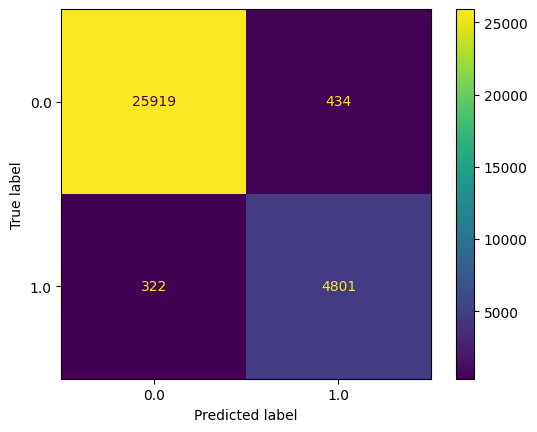

In [578]:
# Question 13: Generate a confusion matrix for the results. How many 
# students are active, but predicted to quit?

from sklearn import metrics
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
labels = y_test.sort_values().unique()

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=labels)
cm_display.plot(values_format='d')
plt.show()

In [579]:
# Question 14: Generate the accuracy, precision, recall, and f1 scores for 
# the predictions of active students. What is the accuracy score?

from sklearn import metrics

# Several of these metrics have to work off of dummy codes rather than categorical values. Therefore:
y_test_dummies = pd.get_dummies(y_test, drop_first=True)
y_pred_dummies = pd.get_dummies(y_pred, drop_first=True)

# Accuracy = (true positives + true negatives) / (total cases); ranges from 0 (worst) to 1 (best)
print(f"Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}")

# Precision = (true positives / (true positives + false positives))
print(f"Precision:\t{metrics.precision_score(y_test_dummies, y_pred_dummies, labels=['no', 'yes'])}")

# Recall = (true positives / (true positives + false negatives)) 
print(f"Recall:\t\t{metrics.recall_score(y_test_dummies, y_pred_dummies, labels=['no', 'yes'])}")

# F1 = (2 * (precision * recall) / (precision + recall))
print(f"F1:\t\t{metrics.f1_score(y_test_dummies, y_pred_dummies, labels=['no', 'yes'])}")

Accuracy:	0.9759817003431186
Precision:	0.9170964660936007
Recall:		0.9371462033964474
F1:		0.9270129368603979


### Visualize Classification Model

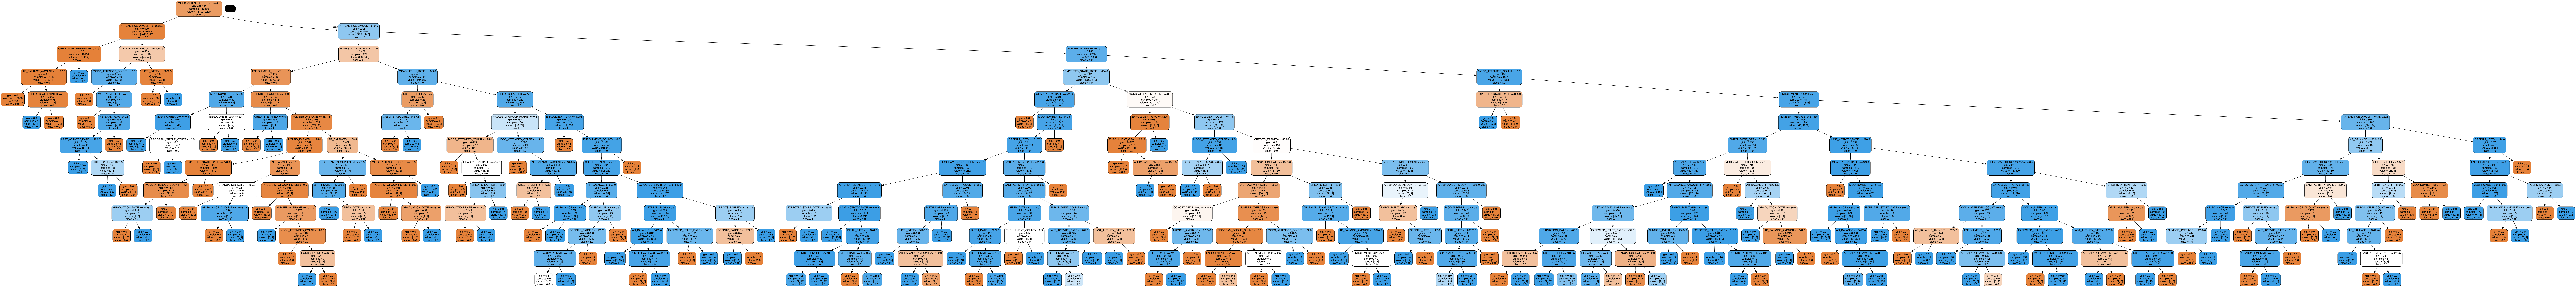

In [580]:
# Question 15: Generate a tree visualization using export_graphviz. 
# What feature is used in the most important feature?

labels = [str(label) for label in labels]

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, # This is the model we trained previously
                out_file = dot_data,
                filled = True,
                rounded = True,
                feature_names = X.columns,
                class_names = labels)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('satisfaction.png') # Save the image file
Image(graph.create_png())     # This is like plt.show()


# **Multi-Class Modeling**

## **Data Cleaning**

### Combine or Eliminate Low Frequency Values

In [581]:
# Question 16: The label 'IN_SCHOOL_FLAG' was ideal for a two-class classification
# model. However, most students are put on probation before they are terminated. 
# Therefore, it could be useful to predict three distinct categories: Active, 
# Probation, and Terminated. First, let's identify what all possible label combinations
# exist across all three labels. Print a list of all value combinations of 
# 'STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', and 'SIMPLE_STATUS_DESCRIPTION' along 
# with a count of how often each occurs. 

# HINT: consider using the .groupby() method of Pandas to perform this in a single
# line of code. See the image below for an example of what this may look like.
# The purpose behind this task is to explore our options for potential labels in
# this dataset. Each of those features represent current states for each student.

df4 = df.copy()

label_combos = df4.groupby(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION']).size()
print(label_combos)

STATUS_DESCRIPTION               IN_SCHOOL_FLAG  SIMPLE_STATUS_DESCRIPTION
Active                           1.0             Active                        6591
Active-Pre Grad                  1.0             Active                         287
Applicant                        0.0             Other                         2524
Application Cancelled            0.0             Other                        12948
Cancel                           0.0             Terminated                    1633
Dismissed                        0.0             Terminated                     203
Drop                             0.0             Terminated                    1562
False Re-Enter                   0.0             Terminated                     460
False Start                      0.0             Terminated                    4075
Future Start                     0.0             Other                          884
Graduate                         0.0             Terminated                     317
N

In [582]:
# Question 17: To simplify our eventual model, eliminate all records for students
# whose 'SIMPLE_STATUS_DESCRIPTION' = 'Other'. Then, reprint the table above to 
# ensure it worked properly.

df4 = df4[df4['SIMPLE_STATUS_DESCRIPTION'] != 'Other']

# Recalculate label_combos after filtering
label_combos = df4.groupby(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION']).size()
print(label_combos)

STATUS_DESCRIPTION         IN_SCHOOL_FLAG  SIMPLE_STATUS_DESCRIPTION
Active                     1.0             Active                        6591
Active-Pre Grad            1.0             Active                         287
Cancel                     0.0             Terminated                    1633
Dismissed                  0.0             Terminated                     203
Drop                       0.0             Terminated                    1562
False Re-Enter             0.0             Terminated                     460
False Start                0.0             Terminated                    4075
Graduate                   0.0             Terminated                     317
No Show                    0.0             Terminated                   17236
Probation                  1.0             Active                         224
Transfer To Other Program  0.0             Terminated                      53
zRe-Apply                  0.0             Unknown                       

In [583]:
# Question 18: Next, eliminate anyone whose 'STATUS_DESCRIPTION' = 
# 'Transfer To Other Program', 'No Show', or 'False Start' since those outcomes
# are not relevant to students who were once active. Re-print the same summary
# table afterward.

df4 = df4[df4['STATUS_DESCRIPTION'] != 'Transfer To Other Program']
df4 = df4[df4['STATUS_DESCRIPTION'] != 'No Show']
df4 = df4[df4['STATUS_DESCRIPTION'] != 'False Start']

label_combos = df4.groupby(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION']).size()
print(label_combos)

STATUS_DESCRIPTION  IN_SCHOOL_FLAG  SIMPLE_STATUS_DESCRIPTION
Active              1.0             Active                       6591
Active-Pre Grad     1.0             Active                        287
Cancel              0.0             Terminated                   1633
Dismissed           0.0             Terminated                    203
Drop                0.0             Terminated                   1562
False Re-Enter      0.0             Terminated                    460
Graduate            0.0             Terminated                    317
Probation           1.0             Active                        224
zRe-Apply           0.0             Unknown                        34
dtype: int64


In [584]:
# Question 19: Finally, relabel the 'SIMPLE_STATUS_DESCRIPTION' of those whose
# 'STATUS_DESCRIPTION' = 'Probation' to 'Probation'. Re-print the table.

df4.loc[df4['STATUS_DESCRIPTION'] == 'Probation', 'SIMPLE_STATUS_DESCRIPTION'] = 'Probation'

# Reprint the table
label_combos = df4.groupby(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG', 'SIMPLE_STATUS_DESCRIPTION']).size()
print(label_combos)

STATUS_DESCRIPTION  IN_SCHOOL_FLAG  SIMPLE_STATUS_DESCRIPTION
Active              1.0             Active                       6591
Active-Pre Grad     1.0             Active                        287
Cancel              0.0             Terminated                   1633
Dismissed           0.0             Terminated                    203
Drop                0.0             Terminated                   1562
False Re-Enter      0.0             Terminated                    460
Graduate            0.0             Terminated                    317
Probation           1.0             Probation                     224
zRe-Apply           0.0             Unknown                        34
dtype: int64


## **Classification Modeling**

### Dummy Codes

In [585]:
# Question 20: Create a new copy of the DataFrame to work from. The features
# 'MOD_NUMBER' and 'COHORT_YEAR' represent categorical values that do not have an 
# order. Therefore, they should be treated as categories and cast to objects. Once
# you have done so, drop the alternative labels 'STATUS_DESCRIPTION' and 
# 'IN_SCHOOL_FLAG' from the dataset because we will be predicting 
# 'SIMPLE_STATUS_DESCRIPTION'. Then, generate dummy codes for the remaining features.
# Print out the first five records to verify everything worked correctly.

df5 = df4.copy()

df5['MOD_NUMBER'] = df5['MOD_NUMBER'].astype('object')
df5['COHORT_YEAR'] = df5['COHORT_YEAR'].astype('object')

df5.drop(['STATUS_DESCRIPTION', 'IN_SCHOOL_FLAG'], axis=1, inplace=True)

df5 = pd.get_dummies(df5, drop_first=True)
df5.head()

ENROLL_COUNT  NUMBER_AVERAGE  MINUTES_ATTENDED  HOURS_ATTEMPTED  \
0           1.0             0.0               NaN              0.0   
1           1.0             0.0               NaN              0.0   
2           1.0             0.0               NaN              0.0   
3           1.0             0.0               NaN              0.0   
4           1.0             0.0               NaN              0.0   

   HOURS_EARNED  AR_BALANCE_AMOUNT  MINUTES_ABSENT  DAYS_ABSENT  \
0           0.0                0.0             NaN          0.0   
1           0.0                0.0             NaN          0.0   
2           0.0                0.0             NaN          0.0   
3           0.0                0.0             NaN          0.0   
4           0.0                0.0             NaN          0.0   

   MINUTES_MAKEUP  REENTRY_NUMBER  ...  COHORT_YEAR_2020.0  \
0             NaN             0.0  ...               False   
1             NaN             0.0  ...               False   
2             NaN             0.0  ...                True   
3             NaN             0.0  ...               False   
4             NaN             0.0  ...               False   

   COHORT_YEAR_2021.0  COHORT_YEAR_2022.0  COHORT_YEAR_2023.0  \
0               False               False               False   
1               False               False               False   
2               False               False               False   
3               False               False               False   
4               False               False               False   

   COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  COHORT_YEAR_2026.0  \
0               False               False               False   
1               False               False               False   
2               False               False               False   
3               False               False               False   
4               False               False               False   

   SIMPLE_STATUS_DESCRIPTION_Other  SIMPLE_STATUS_DESCRIPTION_Terminated  \
0                             True                                 False   
1                             True                                 False   
2                             True                                 False   
3                             True                                 False   
4                             True                                 False   

   SIMPLE_STATUS_DESCRIPTION_Unknown  
0                              False  
1                              False  
2                              False  
3                              False  
4                              False  

[5 rows x 13628 columns]

### Select Label and Features

In [587]:
# Question 21: Create the y and X variables to store the label and features
# using 'SIMPLE_STATUS_DESCRIPTION' as the label. Print out the first five 
# records of X to make sure everything looks correct.

y = df5['SIMPLE_STATUS_DESCRIPTION']
X = df5.drop(columns=['SIMPLE_STATUS_DESCRIPTION'])
X = pd.get_dummies(X, drop_first=True)

X.head()

KeyError: 'SIMPLE_STATUS_DESCRIPTION'

### Split Data

In [588]:
# Question 22: Split the data using 70/30 split and 12345 as the random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=12345)

X_test.head()

EXPECTED_START_DATE  GRADUATION_DATE  ENROLL_COUNT  NUMBER_AVERAGE  \
2148                   236             1544           1.0        0.000000   
22511                  390             1390           1.0        0.000000   
45412                  530             1250           1.0        0.000000   
16742                  348              606           1.0       99.468553   
7689                   292              984           1.0        0.000000   

       HOURS_ATTEMPTED  HOURS_EARNED  AR_BALANCE_AMOUNT  DAYS_ABSENT  \
2148               0.0           0.0                0.0          0.0   
22511              0.0           0.0                0.0          0.0   
45412              0.0           0.0                0.0          0.0   
16742           1790.0        1790.0              -75.0          0.0   
7689               0.0           0.0                0.0          0.0   

       REENTRY_NUMBER  BIRTH_DATE  ...  MOD_NUMBER_8.0  MOD_NUMBER_9.0  \
2148              0.0        7079  ...           False           False   
22511             0.0        9812  ...           False           False   
45412             0.0       12352  ...            True           False   
16742             0.0        9701  ...           False           False   
7689              0.0       13273  ...           False           False   

       MOD_NUMBER_10.0  MOD_NUMBER_11.0  MOD_NUMBER_12.0  MOD_NUMBER_13.0  \
2148             False            False            False            False   
22511            False            False            False             True   
45412            False            False            False            False   
16742            False            False            False            False   
7689             False            False            False            False   

       COHORT_YEAR_2023.0  COHORT_YEAR_2024.0  COHORT_YEAR_2025.0  \
2148                False               False               False   
22511               False               False               False   
45412               False               False                True   
16742               False               False               False   
7689                False                True               False   

       COHORT_YEAR_2026.0  
2148                 True  
22511                True  
45412               False  
16742                True  
7689                False  

[5 rows x 44 columns]

### Create Classifier and Fit Model

In [589]:
# Question 23: Train a decision tree classifier model using the datasets
# you just generated.

clf = DecisionTreeClassifier(random_state=12345, max_depth=12).fit(X_train, y_train)

### Compare Actual Versus Predicted Values

In [591]:
# Question 24: Predict the y values for the testing dataset and add them to
# a DataFrame along with the actual y values for comparison. Print out the 
# first 20 records. 

y_pred = clf.predict(X_test)

predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions_df.head(20)

Actual  Predicted
2148      0.0        0.0
22511     0.0        0.0
45412     0.0        0.0
16742     1.0        1.0
7689      0.0        0.0
22725     0.0        0.0
26189     0.0        0.0
39307     0.0        0.0
48033     0.0        0.0
23015     0.0        0.0
8610      0.0        0.0
32570     0.0        0.0
30188     1.0        1.0
35051     0.0        0.0
25545     0.0        0.0
49027     0.0        0.0
6341      0.0        0.0
40542     0.0        0.0
5979      0.0        0.0
48416     0.0        0.0

### Assess Model Fit/Quality/Accuracy

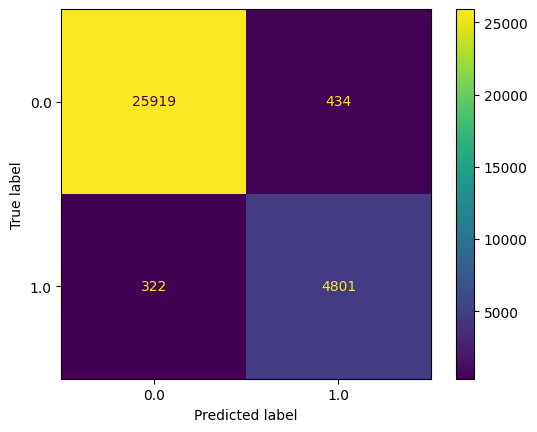

In [592]:
# Question 25: Generate and print a confusion matrix to view the results. 
y_pred = clf.predict(X_test)
labels = y_test.sort_values().unique()

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=labels)
cm_display.plot(values_format='d')
plt.show()

In [593]:
# Question 26: Generate the fit metrics (accuracy, precision, recall, f1)
# for the label value 'terminated'.

y_test_dummies = pd.get_dummies(y_test, drop_first=True)
y_pred_dummies = pd.get_dummies(y_pred, drop_first=True)

# Accuracy = (true positives + true negatives) / (total cases); ranges from 0 (worst) to 1 (best)
print(f"Accuracy:\t{metrics.accuracy_score(y_test, y_pred)}")

# Precision = (true positives / (true positives + false positives))
print(f"Precision:\t{metrics.precision_score(y_test_dummies, y_pred_dummies, labels=['no', 'yes'])}")

# Recall = (true positives / (true positives + false negatives)) 
print(f"Recall:\t\t{metrics.recall_score(y_test_dummies, y_pred_dummies, labels=['no', 'yes'])}")

# F1 = (2 * (precision * recall) / (precision + recall))
print(f"F1:\t\t{metrics.f1_score(y_test_dummies, y_pred_dummies, labels=['no', 'yes'])}")

Accuracy:	0.9759817003431186
Precision:	0.9170964660936007
Recall:		0.9371462033964474
F1:		0.9270129368603979


### Visualize Classification Model

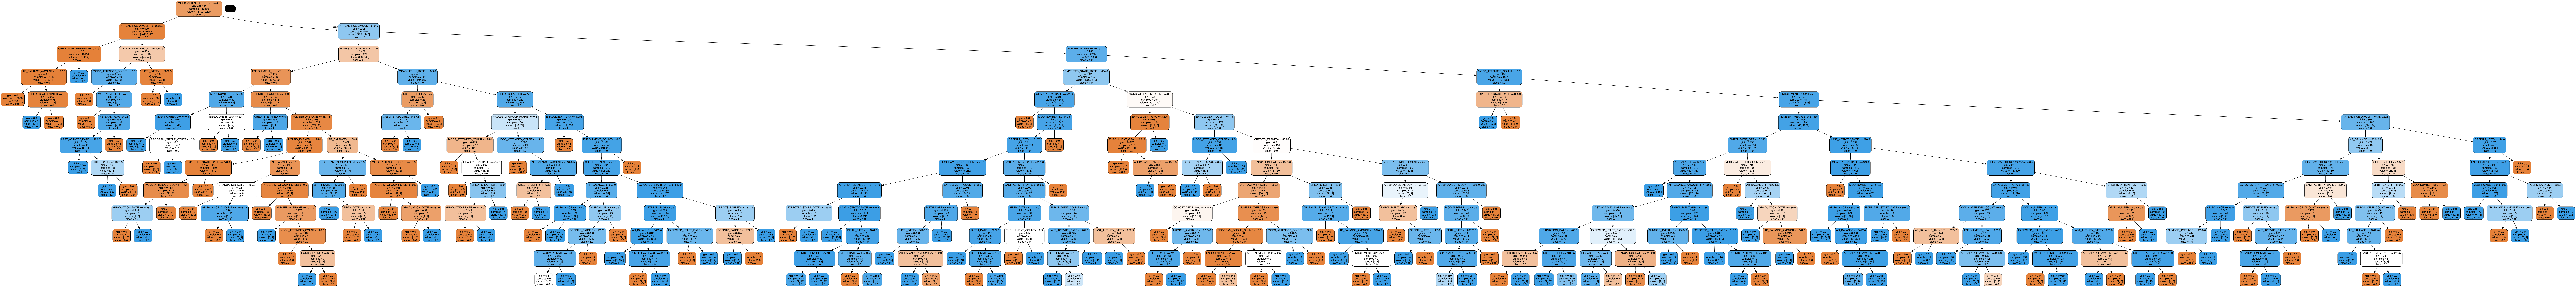

In [594]:
# Question 27: Generate a decision tree visualization using export_graphviz

labels = [str(label) for label in labels]

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, # This is the model we trained previously
                out_file = dot_data,
                filled = True,
                rounded = True,
                feature_names = X.columns,
                class_names = labels)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('satisfaction.png') # Save the image file
Image(graph.create_png())     # This is like plt.show()